# Домашнее задание к лекции «Случайные события. Случайные величины»

Смоделировать игру против лотерейного автомата типа “777”. Игрок платит 1 руб., после чего выпадает случайное целое число, равномерно распределенное от 0 до 999. При некоторых значениях числа игрок получает выигрыш

* Выгодна ли игра игроку?

* Сколько в среднем приобретает или теряет игрок за одну игру?

```
777: 200 руб.  
999: 100 руб.  
555: 50 руб.  
333: 15 руб.  
111: 10 руб.  
*77: 5 руб.  
**7: 3 руб.  
*00: 2 руб.  
**0: 1 руб.  

* – любая цифра 
```
#### Дополнительное задание повышенной сложности.  
Теоретически рассчитать средний выигрыш (проигрыш) и сравнить с результатами моделирования

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [108]:
#Создадим датафрейм, в котором к каждому возможному числу подставим выигрыш / проигрыш в случае выпадения этого числа.

def create_dict():
    dict_ = {'number' : [],
             'profit' : []}
    for i in range(10):
        for j in range(10):
            for k in range(10):
                num = str(i) + str(j) + str(k)
                if num == '777':
                    profit = 199
                elif num == '999':
                    profit = 99
                elif num == '555':
                    profit = 49
                elif num == '333':
                    profit = 14
                elif num == '111':
                    profit = 9
                elif num[1:3] == '77':
                    profit = 4
                elif num[2] == '7':
                    profit = 2
                elif num[1:3] == '00':
                    profit = 1
                elif num[2] == '0':
                    profit = 0
                else:
                    profit = -1
                dict_['number'].append(num)
                dict_['profit'].append(profit)
    return dict_


df = pd.DataFrame(create_dict())
df

,number,profit
0,000,1
1,001,-1
2,002,-1
3,003,-1
4,004,-1
...,...,...
995,995,-1
996,996,-1
997,997,2
998,998,-1


 199      1
 99       1
 49       1
 14       1
 9        1
 4        9
 1       10
 0       90
 2       90
-1      796
Name: profit, dtype: int64 



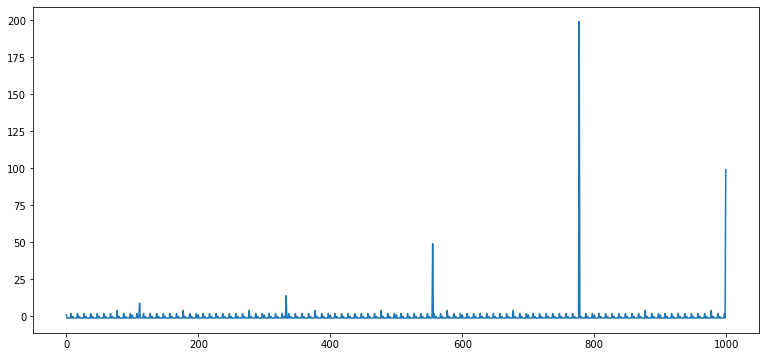

In [175]:
print(df['profit'].value_counts().sort_values(),'\n')
plt.plot(df['profit'])
plt.show()

In [158]:
print(f"Количество возможных чисел: {df['profit'].count()}")
print(f"Количество выигрышных чисел: {df[df['profit'] > 0]['profit'].count()}")
print(f"Количество чисел, при которых 'уходим в ноль': {df[df['profit'] == 0]['profit'].count()}")
print(f"Вероятность выиграть: {df[df['profit'] > 0]['profit'].count() / df['profit'].count()}")
print(f"Вероятность 'уйти в ноль': {df[df['profit'] == 0]['profit'].count() / df['profit'].count()}")
print(f"Вероятность проиграть: {df[df['profit'] < 0]['profit'].count() / df['profit'].count()}")
print(f"Средний выигрыш: {df['profit'].mean()}")

Количество возможных чисел: 1000
Количество выигрышных чисел: 114
Количество чисел, при которых 'уходим в ноль': 90
Вероятность выиграть: 0.114
Вероятность 'уйти в ноль': 0.09
Вероятность проиграть: 0.796
Средний выигрыш: -0.2


==> т.к. средний выигрыш получился отрицательным, то в среднем игрок будет терять деньги, играя в автомат

____
#### Доп. задание.
____

In [190]:
def try_(quantity = 1):
    
    '''
    Функция генерирует одну попытку игры в автомат. Возвращает значение выигрыша / проигрыша.
    Можно указать количество попыток — тогда вернёт суммарный выигрыш или проигрыш
    '''
    
    profit = 0
    for i in range(quantity):
        num = str(np.random.randint(0, 10)) + str(np.random.randint(0, 10)) + str(np.random.randint(0, 10))
        if num == '777':
            profit += 199
        elif num == '999':
            profit += 99
        elif num == '555':
            profit += 49
        elif num == '333':
            profit += 14
        elif num == '111':
            profit += 9
        elif num[1:3] == '77':
            profit += 4
        elif num[2] == '7':
            profit += 2
        elif num[1:3] == '00':
            profit += 1
        elif num[2] == '0':
            profit += 0
        else:
            profit -= 1
    return profit

In [191]:
n = 10000000
try_n = try_(n)
print(try_n)
print(try_n / n)

-2007272
-0.2007272


#### Вывод:
Рассчетный теоретический средний выигрыш составил -0,2.  
Практический же — -0.2007272, что похоже на наш рассчетный вариант.